# Predicting Iris Species (COMPLETE)

## 1. Business understanding

In this notebook, we are going to build a predictive model learning to explore the capacity of machine learning to address the taxonomic impediment.

[Presentation slides](https://docs.google.com/presentation/d/1St9pn2o1xR4_S9GS4uoGl9S4r0JCo8nPppBFBWdf3DA/edit?usp=sharing)

## 2. Setup

### Coding constants

In [53]:
GRAPH_WIDTH = 6
GRAPH_HEIGHT = 5

### Common imports

In [54]:
%matplotlib inline 

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Data modeling libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

## Load the data

In [74]:
df = pd.read_csv('data/iris-species.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
df.shape

(150, 5)

In [76]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

## 3. Data understanding

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### Attributes variables distribution

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

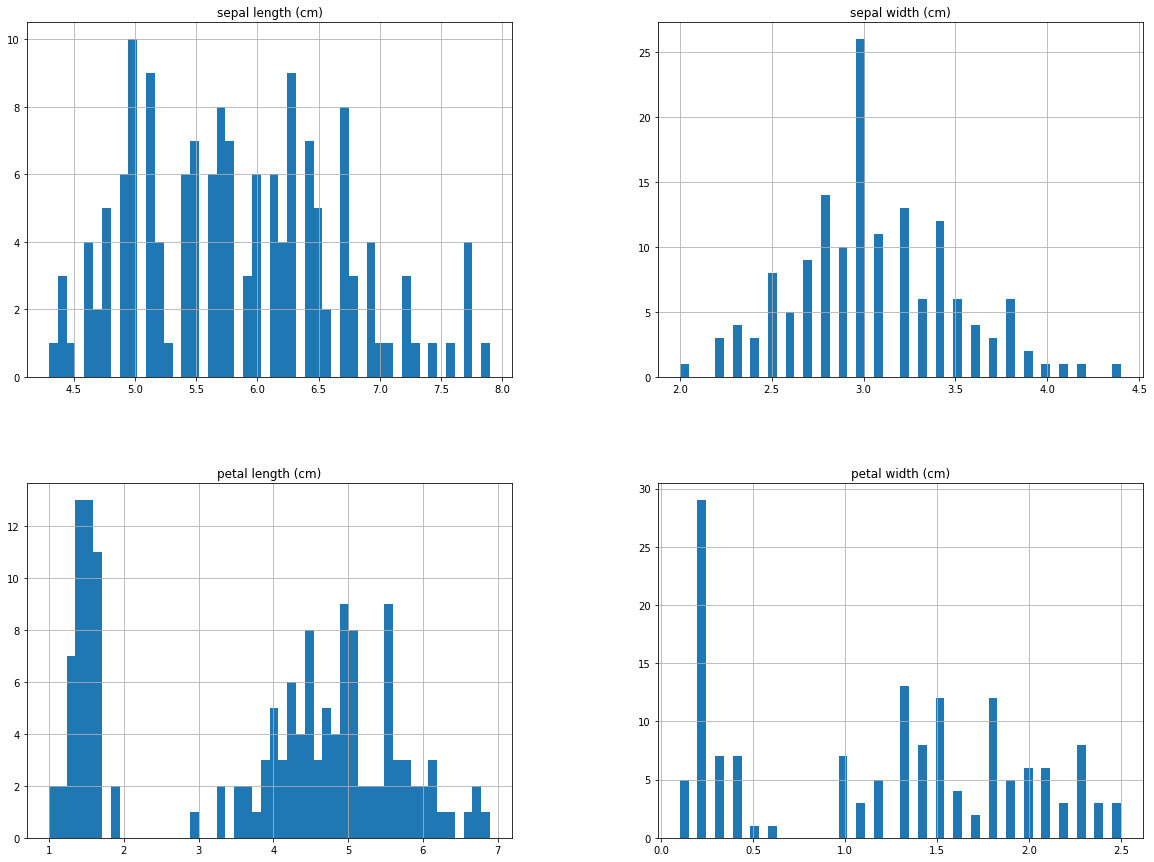

In [78]:
df.hist(bins=50, figsize=(20,15))

**Observations**


### Target variable distribution

<AxesSubplot:>

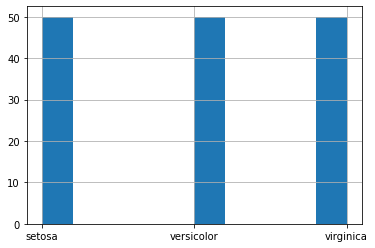

In [79]:
df['species'].hist()

**Observations**


### Visualizing relationships between the target variable and attributes 

**Function for continuous attributes:**

In [71]:
def plot_class_attribute_dist(df, class_var, attribute):
    df.groupby(class_var)[attribute].plot.hist(
        alpha=0.4, figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))
    plt.suptitle(attribute)
    plt.legend()

#### Petal length versus species

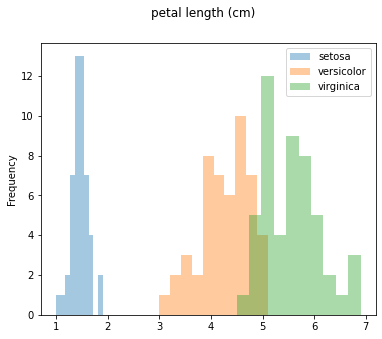

In [16]:
plot_class_attribute_dist(iris_df_viz, 'species', 'petal length (cm)')

#### Petal width length versus species

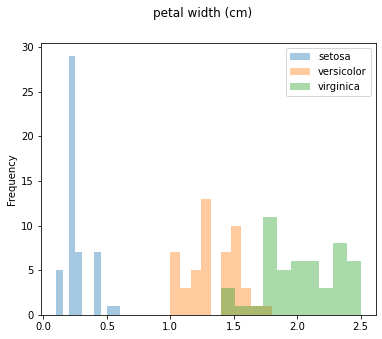

In [81]:
plot_class_attribute_dist(iris_df_viz, 'species', 'petal width (cm)')

#### Sepal length versus species

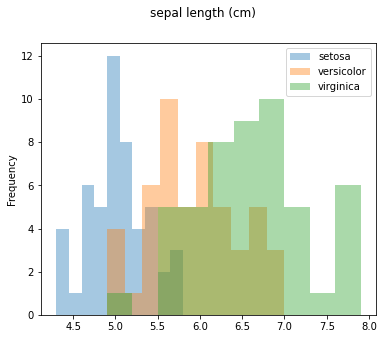

In [80]:
plot_class_attribute_dist(iris_df_viz, 'species', 'sepal length (cm)')

#### Sepal width versus species

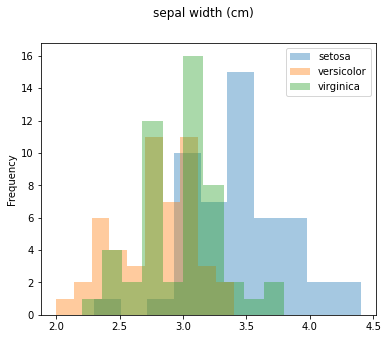

In [15]:
plot_class_attribute_dist(iris_df_viz, 'species', 'sepal width (cm)')

## 4. Data Modeling

The data has been preprocessed already, so there is nothing to do here.

## 5. Data Modeling

In [82]:
training = df.loc[:, df.columns != 'species']
labels = df['species']

### Evaluating performance

We will use the ratio between correct and wrong predictions as a simple measure of performance to compare different models:

In [83]:
def evaluate_performance(model, training, labels):
    labels_pred = model.predict(training)
    n_correct = sum(labels_pred == labels)    
    print(
        f"Model performance: {((n_correct / len(labels_pred)) * 100):.2f}%")

## Decision tree with depth = 10

In [91]:
tree_depth_10_clf = DecisionTreeClassifier(
    max_depth = 10)

tree_depth_10_clf.fit(training, labels)

DecisionTreeClassifier(max_depth=10)

In [92]:
evaluate_performance(tree_depth_10_clf, training, labels)

Model performance: 100.00%


## Logistic regression

In [93]:
logistic_regr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic_regression", LogisticRegression()),
])

logistic_regr_clf.fit(training, labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [94]:
evaluate_performance(logistic_regr_clf, training, labels)

Model performance: 97.33%


## Linear support vector machine

In [95]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC()), # SVC stands for support vector classifier
])

In [96]:
svm_clf.fit(training, labels)

Pipeline(steps=[('scaler', StandardScaler()), ('linear_svc', LinearSVC())])

In [97]:
evaluate_performance(svm_clf, training, labels)

Model performance: 94.67%


### Assessing feature importance

In [98]:
feature_importances = pd.Series(
    tree_depth_10_clf.feature_importances_,
    index=training.columns)

feature_importances.sort_values(inplace=True, ascending=False)
for feature in enumerate(feature_importances.index):
    print(f"{(feature[0]+1):02d}) {feature[1]:<30} {feature_importances[feature[0]]:.4f}")

01) petal length (cm)              0.5641
02) petal width (cm)               0.4226
03) sepal length (cm)              0.0133
04) sepal width (cm)               0.0000


<AxesSubplot:>

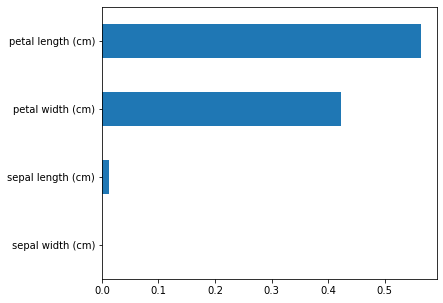

In [99]:
plt.figure(figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))
feature_importances.sort_values(ascending=True).plot.barh()

## 6. Evaluation

After selecting the best model, the last step is to evaluate its performance and assess its generability.

We will leave this task for another class.